## Image Convolutions
Convolve an image and print the output image to the notebook. You will convolve your image using various kernels

Sabrina Dini, AI PERIOD 5 

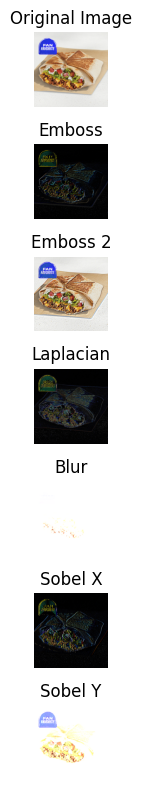

In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

def displayImages(images):
    numImages = len(images)
    
    # Create a figure and two subplots
    fig, axs = plt.subplots(numImages, 1, figsize=(15, 8))
    
    #fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    for lp in range(numImages):
    
        title, img = images[lp]
        cleanImg = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        
        axs[lp].imshow(cleanImg)
        axs[lp].set_title(title)
        axs[lp].axis('off')  # Hide axes
        
    # Show the images
    plt.tight_layout()
    plt.show()

# load in image, ensure the image can be read
img = cv.imread('crunchwrap.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"

def filter(img, key):

    if key == 1:
        # Emboss
        kernel = np.array([
            [-1, -1, 0],
            [-1, 0, 1],
            [0, 1, 1]
        ], dtype=np.float32)
    elif key == 2:
        # Emboss 2
        kernel = np.array([
            [-2, -1, 0],
            [-1, 1, 1],
            [0, 1, 2]
        ], dtype=np.float32)
    elif key == 3:
        # laplacian
        kernel = np.array([
            [1, 1, 1],
            [1, -8, 1],
            [1, 1, 1]
        ], dtype=np.float32)
    elif key == 4:
        # blur
        kernel = np.array([
            [1, 1, 1],
            [1, 1, 1],
            [1, 1, 1]
        ], dtype=np.float32)
    elif key == 5:
        # Sobel x
        kernel = np.array([
            [1, 0, -1],
            [2, 0, -2],
            [1, 0, -1]
        ], dtype=np.float32)
    elif key == 6:
        # Sobel y 
        kernel = np.array([
            [1, 2, 1],
            [0, 0, 0],
            [-1, 2, -1]
        ], dtype=np.float32)

    return cv.filter2D(src=img, ddepth=-1, kernel=kernel)

displayImages([('Original Image', img), 
               ('Emboss', filter(img, 1)),
               ('Emboss 2', filter(img, 2)),
               ('Laplacian', filter(img, 3)),
               ('Blur', filter(img, 4)),
               ('Sobel X', filter(img, 5)),
               ('Sobel Y', filter(img, 6)),])



## Edge Detection

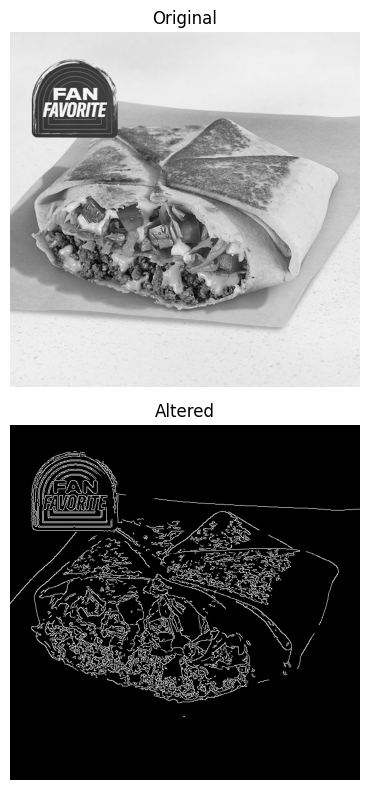

In [3]:
img = cv.imread("crunchwrap.jpg", cv.IMREAD_GRAYSCALE)  # Read image 
  
t_lower = 150  # Lower Threshold 
t_upper = 250  # Upper threshold 
  
# Applying the Canny Edge filter 
edge = cv.Canny(img, t_lower, t_upper) 
  
displayImages([('Original', img), ('Altered', edge)])

## Sobel Edge Detection

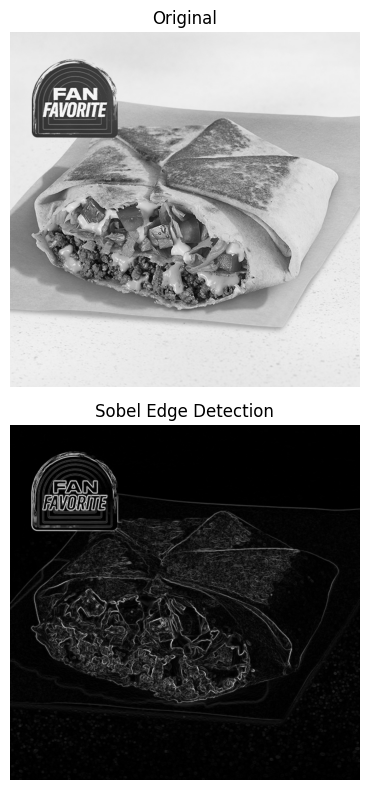

In [4]:

crunch = cv.imread("crunchwrap.jpg", cv.IMREAD_GRAYSCALE)  # Read image 

def sobel_edge_detection(img):
    
    # Apply the Sobel operator in the X and Y direction
    sobel_x = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=3)
    sobel_y = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=3)

    # Compute the gradient magnitude
    sobel_edges = np.sqrt(sobel_x**2 + sobel_y**2)

    # Normalize to range 0-255 as sobel uses float 64 
    sobel_edges = cv.normalize(sobel_edges, None, 0, 255, cv.NORM_MINMAX)

    # Convert to uint8 image (unsigned integers)
    sobel_edges = np.uint8(sobel_edges)

    return sobel_edges

displayImages([('Original', crunch), ('Sobel Edge Detection', sobel_edge_detection(crunch))])

## Hough Line Transform - Detecting Lines in an image

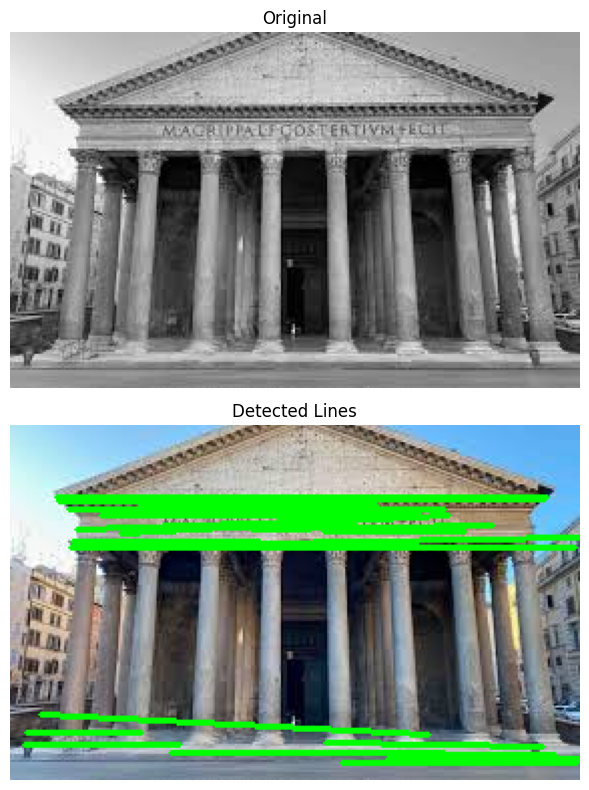

In [53]:
# Load image in grayscale
img = cv.imread('horizontal.jpg')

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray,100,150,apertureSize = 3)
lines = cv.HoughLinesP(edges,1,np.pi/180,100,minLineLength=50,maxLineGap=10)


for line in lines:
    x1,y1,x2,y2 = line[0]
    cv.line(img,(x1,y1),(x2,y2),(0,255,0),2)


# Display the result
displayImages([('Original', cv.imread('horizontal.jpg', cv.IMREAD_GRAYSCALE)),('Detected Lines', img)])

